In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
with open('ASTR19_S22_group_project_data.txt') as f:
    lines = f.readlines()

In [10]:
lines

['#Column A: Day of the year\n',
 '#Column B: Time in hours:minutes\n',
 '#Column B: Tide Height in feet\n',
 ' 1  8:07  6.57\n',
 ' 1 15:37 -0.39\n',
 ' 2  8:55  5.38\n',
 ' 2 16:25 -1.74\n',
 ' 3  9:45  5.26\n',
 ' 3 17:14 -1.36\n',
 ' 4 10:35  4.13\n',
 ' 4 18:00 -1.15\n',
 ' 5 11:28  3.48\n',
 ' 5 18:46 -1.61\n',
 ' 6 12:22  2.62\n',
 ' 6 19:31  0.05\n',
 ' 7 13:24  1.83\n',
 ' 7 20:16  1.01\n',
 ' 8  3:22  3.57\n',
 ' 8 21:01  0.73\n',
 ' 9  4:07  4.54\n',
 ' 9 21:46  2.17\n',
 '10  4:50  3.76\n',
 '10 11:58  2.88\n',
 '11  5:31  3.90\n',
 '11 12:56  1.92\n',
 '12  6:08  4.73\n',
 '12 13:45  1.74\n',
 '13  6:47  5.66\n',
 '13 14:25  0.79\n',
 '14  7:22  5.33\n',
 '14 15:00 -0.04\n',
 '15  7:59  5.23\n',
 '15 15:34 -1.12\n',
 '16  8:34  6.67\n',
 '16 16:08 -0.61\n',
 '17  9:10  4.74\n',
 '17 16:41 -0.93\n',
 '18  9:45  4.69\n',
 '18 17:12 -1.29\n',
 '19 10:21  4.20\n',
 '19 17:45  0.22\n',
 '20 10:57  3.68\n',
 '20 18:15  0.26\n',
 '21 11:38  2.47\n',
 '21 18:48  0.36\n',
 '22 12:2

In [23]:
data = np.loadtxt('ASTR19_S22_group_project_data.txt', dtype = "str")


In [27]:
day, time, tide = [],[],[]

for i in data:
        day = np.append(day, int(i[0]), axis=None)
        time = np.append(time, i[1], axis=None)
        tide = np.append(tide, float(i[2]), axis=None)



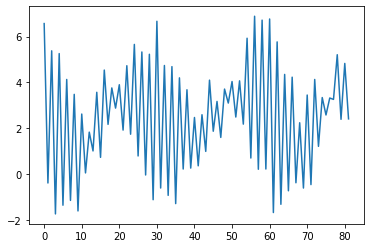